# Chapter 6: Artificial Neural Networks

โค้ดตัวอย่างการสร้างโมเดล Artificial Neural Networks (ANNs) ในการจำแนกประเภทเสื้อผ้าจากภาพ ตัวอย่างนี้ใช้ชุดข้อมูล [Fashion-MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) โค้ดถูกเขียนโดยใช้ไลบรารี่ [`Tensorflow/Keras`](https://keras.io/about/)

**Reference**: https://medium.com/@cdabakoglu/artificial-neural-network-with-keras-d858f82f90c5

### ขั้นตอน
1. Import Package and Module
2. Load Dataset
3. Prepare Data
4. Train ANN model
5. Model Evaluation

## 1. Import Package and Module

ทำการนำเข้าแพ็กเกจและโมดูลที่จำเป็นต้องใช้อย่าง Tensorflow และ Keras ส่วน Matplotlib ใช้สำหรับแสดงผล

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

## 2. Load Dataset

ทำการโหลดชุดข้อมูล Fashion-MNIST ซึ่งแบ่งข้อมูลออกเป็น 2 ส่วน เป็นชุดข้อมูลสอน (Training Data) และชุดข้อมูลทดสอบ (Test Data) ไว้ให้แล้ว ส่วนข้อมูล Input เป็นภาพขาวดำขนาด 28x28 pixels ส่วนข้อมูล Output เป็นเลข 0-9 แทนเสื้อผ้าแต่ละประเภทดังนี้

|Label |	Description |
|----|----|
| 0 |	T-shirt/top |
| 1	| Trouser |
| 2	| Pullover |
| 3	| Dress |
| 4	| Coat |
| 5	| Sandal |
| 6	| Shirt |
| 7	| Sneaker |
| 8	| Bag |
| 9	| Ankle boot |



In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

Sanity Check: ลองพล็อตภาพในชุดข้อมูลดู

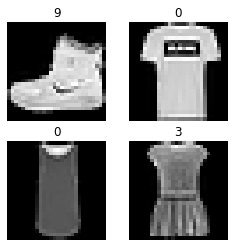

In [3]:
plt.figure(figsize=(4,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title(y_train[i])

## 3. Prepare Data

การเตรียมข้อมูลให้สามารถใช้ในการสร้างโมเดลได้ เนื่องจากโมเดล ANN รองรับ Input เป็นอาเรย์ 1 มิติเท่านั้น จึงทำการนำค่า Pixel ที่เป็นอาเรย์ 2 มิติ มาเรียงเป็นอาเรย์ 1 มิติแทน ส่วนข้อมูล Output เดิมเป็น Label Encoding ที่ใช้เลข 0-9 แทนเสื้อผ้าทั้ง 10 ประเภท จะถูกแปลงเป็น One-Hot Encoding ด้วยฟังก์ชัน [`to_categorical`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) เพื่อให้การคำนวณ Loss Function ทำได้ง่าย

In [4]:
x_train = x_train.reshape(-1,784)
y_train = tf.keras.utils.to_categorical(y_train)
x_test = x_test.reshape(-1,784)
y_test = tf.keras.utils.to_categorical(y_test)

## 4. Train ANN model

เริ่มต้นจากการกำหนด Hyperparameter ของ ANN โมเดล โดยให้มี Hidden Layer 2 ชั้น ที่มีจำนวน 8 และ 6 units ตามลำดับ โดยมี ReLU เป็น Activation Function ส่วน Output Layer มี 10 units เพราะมี 10 ประเภท และใช้ Softmax เป็น Activation Function  

กำหนดให้ Loss Function เป็น Categorical Cross-Entropy (CE) $$ CE = -\sum_{i=1}^n y_i \log \hat{y}_i $$ โดย $n$ เป็นจำนวนตัวอย่าง, $y_i$ เป็นประเภทของตัวอย่าง $i$, $\hat{y}_i$ เป็นประเภทที่โมเดลทำนายของตัวอย่าง $i$ แล้วใช้อัลกอริทึม Adam เป็น Optimization Method และประเมินโมเดลด้วยความแม่นยำ (Accuracy)

In [5]:
classifier = Sequential()
classifier.add(Dense(units=8, kernel_initializer="uniform", activation="relu", input_dim=x_train.shape[1])) # Hidden Layer 1 with 8 nodes
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))  # Hidden Layer 2 with 6 nodes
classifier.add(Dense(units=y_train.shape[1], kernel_initializer="uniform", activation="softmax")) # Output Layer
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Sanity Check: ใช้ฟังก์ชัน [`summary`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) พิมพ์โครงสร้างของโมเดล และใช้ฟังก์ชัน [`plot_model`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model) แสดงโครงสร้างของโมเดล

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
Total params: 6,404
Trainable params: 6,404
Non-trainable params: 0
_________________________________________________________________


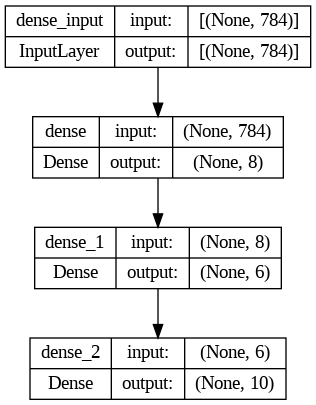

In [7]:
tf.keras.utils.plot_model(classifier, show_shapes=True)

ทำการสร้างโมเดลโดยเรียกฟังก์ชัน [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) โดยกำหนดจำนวน epoch เป็น 10 รอบ และขนาด batch เป็น 32 ตัวอย่าง

In [8]:
classifier.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6686 - accuracy: 0.7560
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5068 - accuracy: 0.8202
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4829 - accuracy: 0.8299
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4707 - accuracy: 0.8345
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4548 - accuracy: 0.8404
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4518 - accuracy: 0.8417
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4474 - accuracy: 0.8436
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8454
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4346 - accuracy: 0.8479
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.429

## 5. Model Evaluation

ทำการทดสอบโมเดลโดยลองทำนายภาพในชุดข้อมูลทดสอบ และคำนวณค่าความแม่นยำ

In [9]:
_, accuracy = classifier.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 1ms/step - loss: 0.4877 - accuracy: 0.8308
Accuracy: 83.08


------